In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json
import random

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from essentia.standard import EasyLoader, FrameGenerator, MonoLoader

cwd = os.getcwd()
sys.path.append(os.path.dirname(cwd))

from lib.directories import DATASET_NAME, AUDIO_DIR, GT_PATH, FSD50K_DIR

import IPython.display as ipd

SAMPLE_RATE = 16000
TRIM_DUR = 30

FRAME_DUR = 0.96 #msec
#HOP_DUR = 0.1 #msec
FRAME_SIZE = int(SAMPLE_RATE*FRAME_DUR)

2023-07-08 19:04:00.919051: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
[   INFO   ] MusicExtractorSVM: no classifier models were configured by default
2023-07-08 19:04:01.419714: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 19:04:01.421624: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-08 19:04:01.444387: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-08 19:04:01.444407: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA dia

## Duration Distribution

In [2]:
df = pd.read_csv(GT_PATH)
df.head()

,fname,labels,mids
0,37199,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
1,175151,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
2,253463,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
3,329838,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"
4,1277,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf"


In [3]:
durations, abs_max = [], []
loader = EasyLoader()
for fname in df["fname"].values:
    audio_path = os.path.join(AUDIO_DIR, f"{fname}.wav")
    # loader.configure(filename=audio_path, sampleRate=44100, replayGain=0) # endTime=TRIM_DUR, 
    # audio = loader()
    audio = MonoLoader(filename=audio_path, sampleRate=44100)()
    #abs_max.append(np.abs(audio).max())
    durations.append(len(audio)/44100)
# abs_max = sorted(abs_max)
# abs_max = np.array(abs_max)
durations = sorted(durations)
durations = np.array(durations)

print("Duration statistics")
print(f"min: {durations.min()}")
print(f"max: {durations.max()}")
print(f"mean: {durations.mean()}")
print(f"std: {durations.std()}")

# print("Max amplitude statistics")
# print(abs_max.min())
# print(abs_max.max())
# print(abs_max.mean())
# print(abs_max.std())

[ WARNING  ] AudioLoader: error while decoding, skipping frame: Invalid data found when processing input
[ WARNING  ] AudioLoader: error while decoding, skipping frame: Invalid data found when processing input
[ WARNING  ] AudioLoader: error while decoding, skipping frame: Invalid data found when processing input
[ WARNING  ] AudioLoader: error while decoding, skipping frame: Invalid data found when processing input


In [ ]:
print(100*len([d for d in durations if d < 1])/len(durations))

7.4870491643045645


In [103]:
def print_plot_play(x):
    print(f'shape = {x.shape}, dtype = {x.dtype}')
    
    N = x.shape[0]
    time = np.arange(0, (N//SAMPLE_RATE)+1)
    #max_val = np.max(np.abs(x))
    
    fig,ax=plt.subplots(figsize=(15, 4),tight_layout=True)
    ax.plot(x)
    #ax.vlines(np.arange(N//FRAME_SIZE), -max_val, max_val, color="r")
    ax.set_xlim([-100,N+101])
    ax.set_xticks(time*SAMPLE_RATE)
    ax.set_xticklabels(time)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude')
    ax.grid()
    plt.show()
    
    ipd.display(ipd.Audio(data=x, rate=SAMPLE_RATE, normalize=False))

In [17]:
with open(f"{FSD50K_DIR}/FSD50K.metadata/eval_clips_info_FSD50K.json" ,"r") as infile:
    metadata_dict = json.load(infile)
audio_ids = list(metadata_dict.keys())

415202
/data/FSD50K/FSD50K.eval_audio/415202.wav
title: Cloth Tearing.mp3
description: A brief ripping sound of tearing cloth. It could also be used for sticky tape being yanked off the roll. (My apologies for the bird calls in the background, field-recordings are difficult in a rural area.)
tags: ['clothes', 'ripping', 'cloth', 'rip', 'material', 'tear', 'tore']
license: http://creativecommons.org/publicdomain/zero/1.0/
uploader: Yin_Yang_Jake007
shape = (69799,), dtype = float32


[   INFO   ] On connection Resample::signal → Trimmer::signal:
[   INFO   ] BUFFER SIZE MISMATCH: max=3172 - asked for read size 4096
[   INFO   ] resizing buffer to 36040/4505


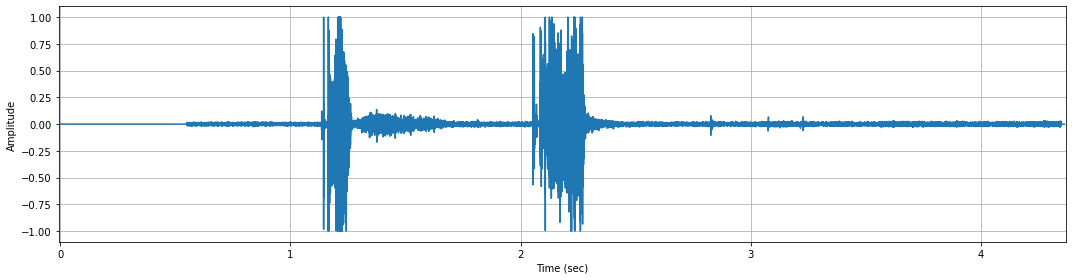

In [108]:
audio_id = audio_ids[random.randint(0, len(audio_ids))]
print(audio_id)
audio_path = os.path.join(AUDIO_DIR, f"{audio_id}.wav")
print(audio_path)
for key,value in metadata_dict[audio_id].items():
    print(f"{key}: {value}")

loader = EasyLoader()
loader.configure(filename=audio_path, sampleRate=SAMPLE_RATE, endTime=TRIM_DUR, replayGain=0)
audio = loader()

print_plot_play(audio)

In [109]:
for frame in FrameGenerator(audio, frameSize=FRAME_SIZE, hopSize=FRAME_SIZE):
    print(np.sum(np.square(frame)))

0.0
188.50093
241.47702
1.1614473
1.1049684
0.039768193
